In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Reading Data and Checking Basic Information

In [2]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#print(df.head(5))


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# #Converting "Total Charges" to Numeric Column 

In [5]:
#df['TotalCharges'] = df['TotalCharges'].astype(float)


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

#Checking Data Type after making changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#  **Checking distribution & skewness of continous variables and trying to improve skewness**

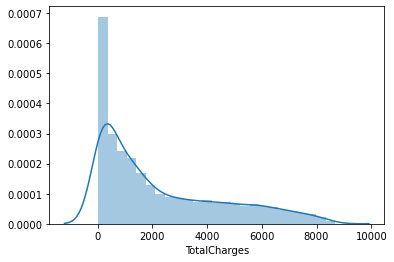

0.961642499724251


In [6]:
#print(df[df['TotalCharges'].isnull()])

sns.distplot(df['TotalCharges'])
plt.show()
print(df['TotalCharges'].skew())

**Above figure shows Actual distribution of column "Total Charges" **

# Lets Try to improve distribution of this column

0.3089261418986736


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1044: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


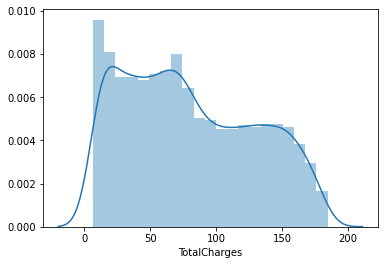

In [7]:
#sns.pairplot(df)
#plt.show()
from scipy.stats import boxcox

#sns.distplot(df['TotalCharges'])
#df['TotalCharges']=df['TotalCharges'].transform('sqrt')
df['TotalCharges'] = boxcox(df['TotalCharges'],0.5)
print(df['TotalCharges'].skew())

sns.distplot(df['TotalCharges'])
plt.show()




**we can see from above figure and skewness score that distribution is little better if we take square root of the column, instead of actual values!!**

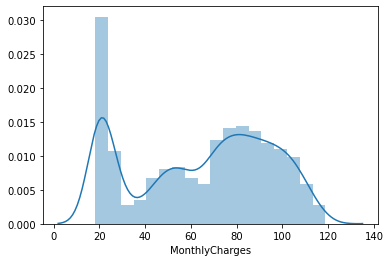

Checking Skewness :-  -0.22052443394398033


In [8]:
sns.distplot(df['MonthlyCharges'])
plt.show()
print("Checking Skewness :- ",df['MonthlyCharges'].skew())


**Since Skewness is already very low we will not take any action on this column!!**

# **Analyzing all Categorical Varibles with respect to Churn Variable**

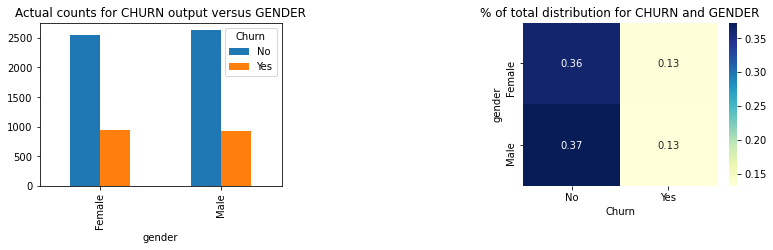

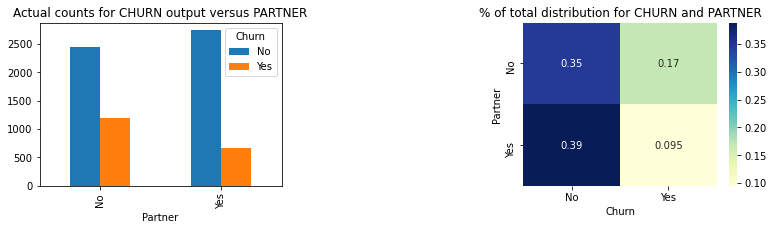

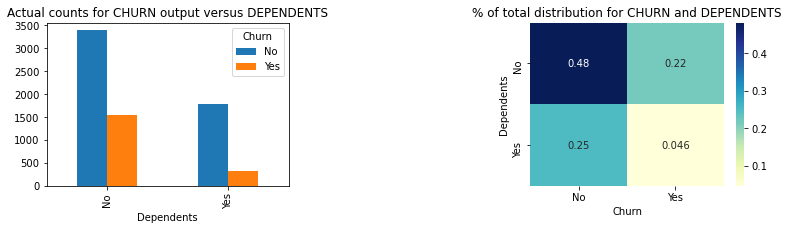

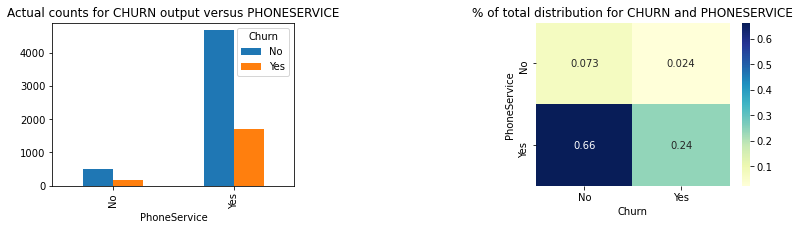

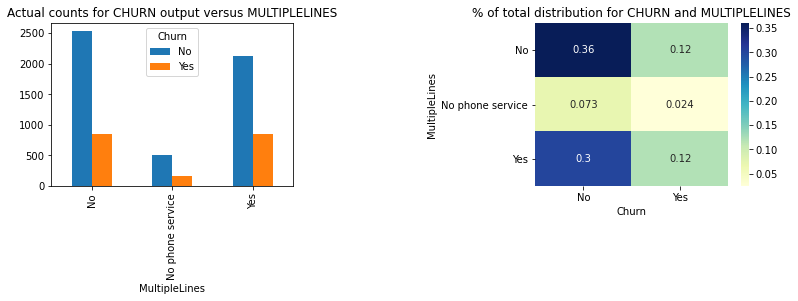

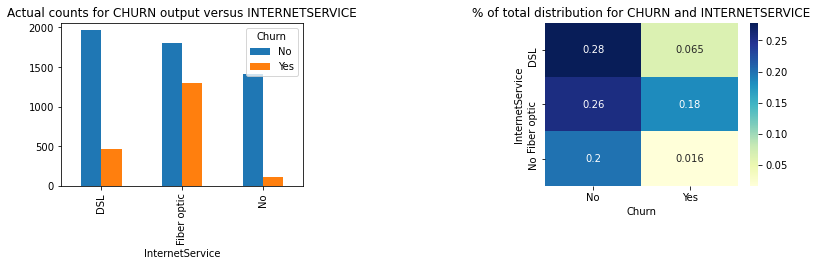

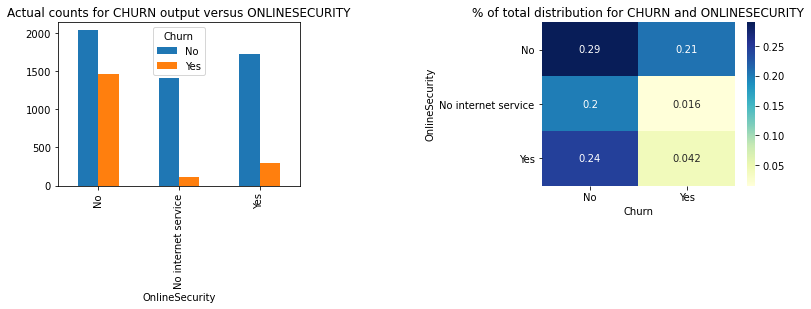

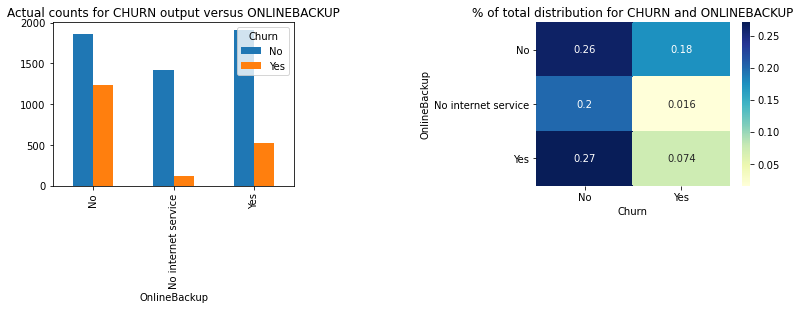

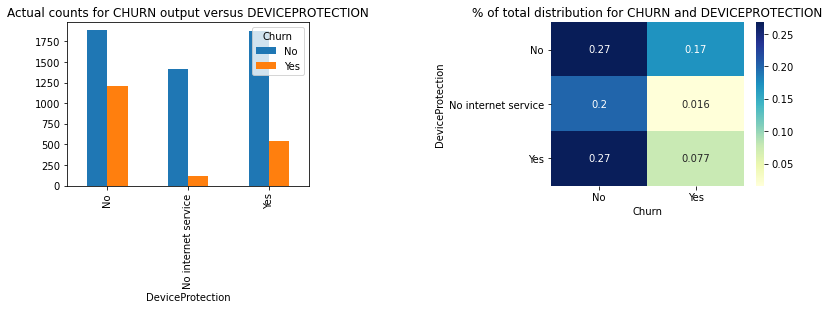

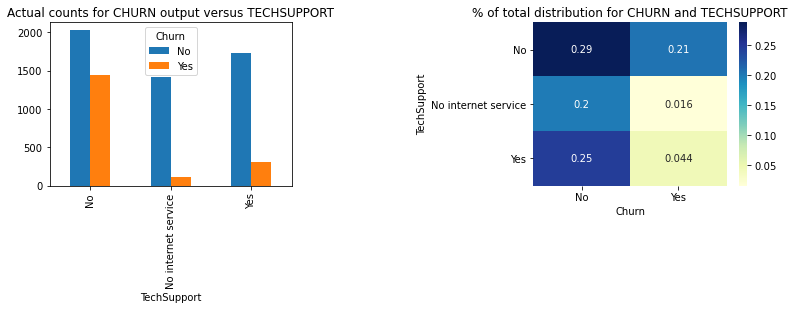

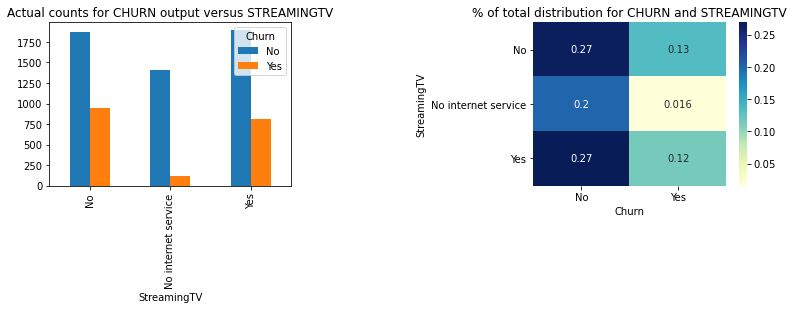

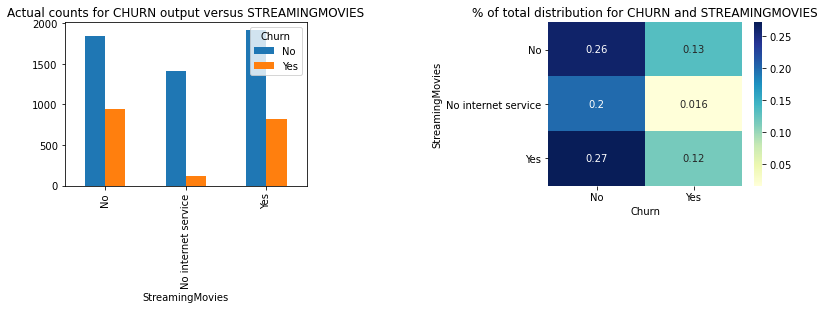

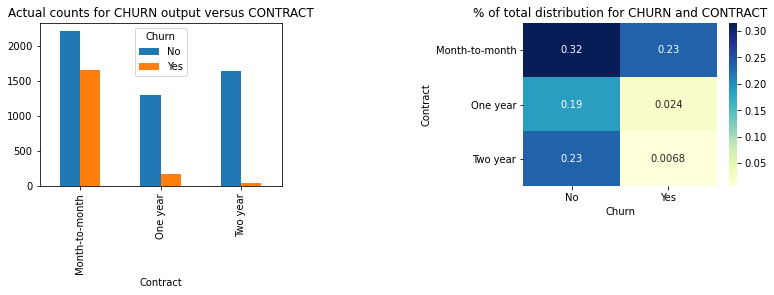

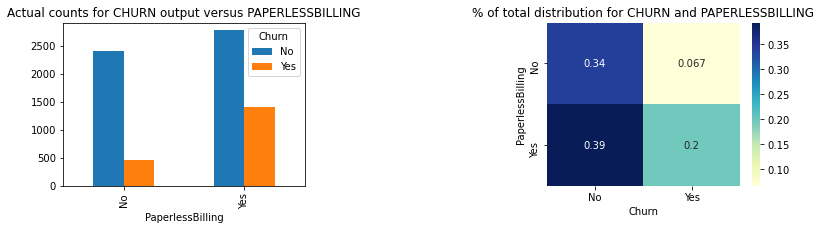

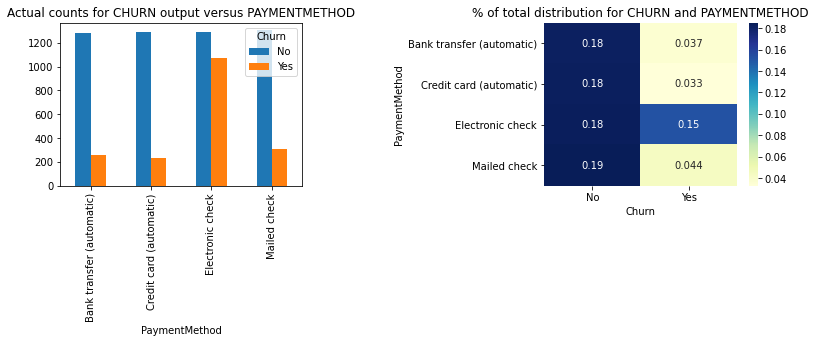

In [9]:
# Creating a function to take DF and identify Categorical Varibles and create a crosstab 
#and plot the same.
def category_rel_y(df):
    X=df.columns
    #print(df[X[1]])
 
    #print(len(X))
 
    for i in range(1,len(X)-2):
        
    
        if (df[X[i]].dtype=='object'):
                fig, axs = plt.subplots(1, 2,figsize=(13,3))
                tab_values=pd.crosstab(df[X[i]],df.iloc[:,20])
                #Creating  % of total values cross tab by using 'normalize=True' in normal tab
                tab_percentage=pd.crosstab(df[X[i]],df.iloc[:,20],normalize=True)
                #print(tab_percentage)
                tab_values.plot(kind='bar', stacked=False ,ax=axs[0] )
                sns.heatmap(tab_percentage,annot=True,cmap='YlGnBu',ax=axs[1])
                plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=None)
                #sns.barplot(tab)
                axs[0].set_title('Actual counts for CHURN output versus '+X[i].upper())
              
                plt.title("% of total distribution for CHURN and "+(X[i]).upper()) 
                plt.show()
                 
            
        
        
 #plt.show()     
category_rel_y(df)   

**After Observing above charts we can see some variables like** 
* "Contract"
* "OnlineSecurity"
* "InternetService" 
* "Payment Method"
* "Paperless Billing"



**Can strongly differentiate between Churn and No Churn**

# Checking **Tenure** relationship with **Churn** by creating bins

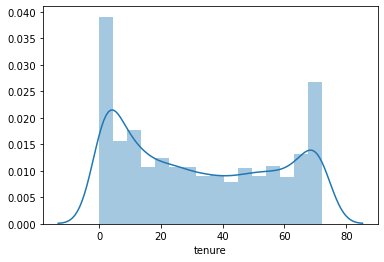

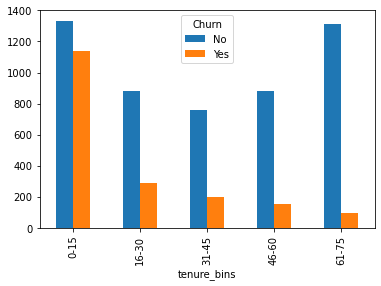

In [10]:
sns.distplot(df['tenure'])
df['tenure'].skew()

def bins(x):
    if x>=0 and x<=15:
        return '0-15'
    elif x>=16 and x<=30:
        return '16-30'
    elif x>=31 and x<=45:
        return '31-45'
    elif x>=46 and x<=60:
        return '46-60'
    elif x>=61 and x<=75:
        return '61-75'
    else:
        return 'Above 80'
df['tenure_bins']=df['tenure'].map(bins)
#print(df[['tenure_bins','tenure']])

x=(pd.crosstab(df['tenure_bins'],df['Churn']))

x.plot(kind='bar', stacked=False)

plt.show()

It is visible here that people with less tenure are likely to quit more!

# **We will now check Correlation among numeric variables.**

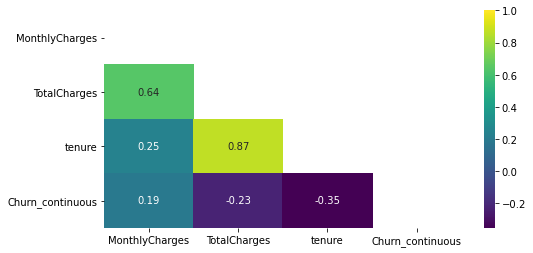

In [11]:
#sns.heatmap(df.corr(),annot=True,cmap='viridis')
#plt.show()


#Convert Churn into numerical values of 0 and 1 to get correlation with other numerical variables
churn=pd.get_dummies(df["Churn"],drop_first=True)
churn.rename(columns = {'Yes':'Churn_continuous'}, inplace = True) 
df=pd.concat([df,churn],axis=1)



df_corr=df[['MonthlyCharges','TotalCharges','tenure','Churn_continuous']].corr()
#create a mask to avoid duplicates in correlation matrix
mask = np.zeros_like(df_corr, dtype=np.bool)
#print(mask.shape)
mask[np.triu_indices_from(mask)] = True
fig=plt.subplots(figsize=(8,4))
sns.heatmap(df_corr,annot=True,cmap='viridis',mask=mask)
plt.show()

1. **We can see churn has high negative relation with "Total Charges" and "Tenure", which makes sense because if you are a long tenure customer or Charges are high then you are less like to quit the membership!!**
 
1. **Also, We should remove "tenure" Or "Total Charges" from our train model since they seem to have very high Correlation among themselves.**
1. **But we observe that "Total Charges" also have high correaltion with "Monthly Charges", So we will remove "Total Charges" from our Dataset**

# Lets check Relation of other important categorical variables with Monthly charges, since its seems to have strong negative relation with Churn

Both Boxplot and violin chart show following Information:-
*   median (a white dot on the violin plot)
*   interquartile range (the black bar in the center of violin)
*   Outliers

![](https://miro.medium.com/max/780/1*TTMOaNG1o4PgQd-e8LurMg.png)
Source for image and info:-https://towardsdatascience.com/violin-plots-explained-fb1d115e023d
  


**We will use Violin Chart instead of box plot** because of following reasons:-
Advantage of the violin plot over the box plot is that aside from showing the 
statistics like it also shows the entire distribution of the data.
This is of interest, especially when dealing with multimodal data, i.e.,
a distribution with more than one peak. 



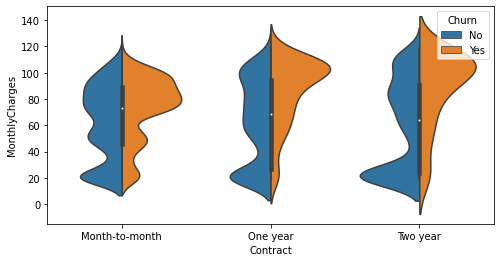

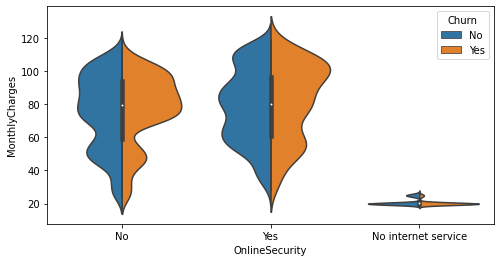

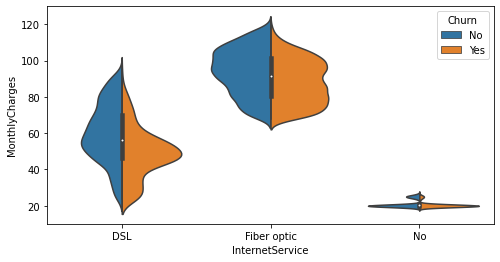

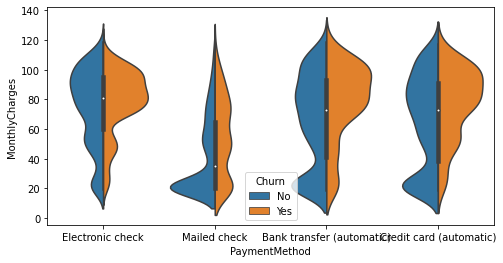

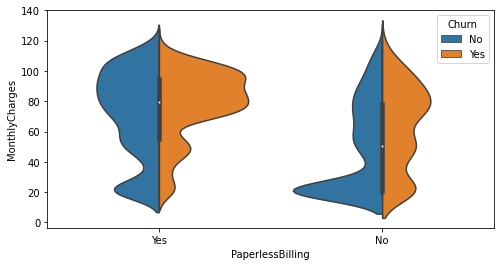

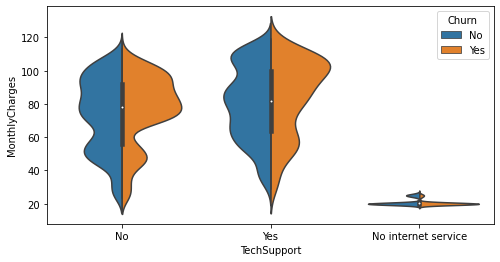

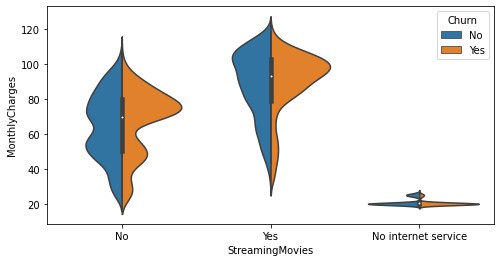

In [12]:
list=["Contract",
"OnlineSecurity",
"InternetService",
"PaymentMethod",
"PaperlessBilling","TechSupport","StreamingMovies"]

for i in range(len(list)):
    fig, ax = plt.subplots(figsize =(8, 4)) 
    sns.violinplot(ax = ax,data=df, x = list[i],  
                  y = "MonthlyCharges", hue="Churn", kind='violin',split=True) 



# * *We can clearly See from above Charts that if Monthly charges are high, there is tendancy for High Churn*


# **Check the target variable for Class Imbalance**

No     5174
Yes    1869
Name: Churn, dtype: int64


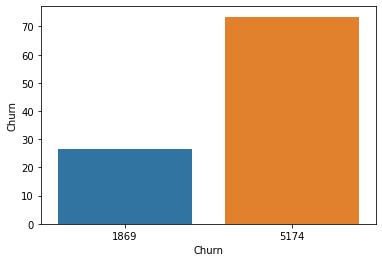

In [13]:
X=df['Churn'].value_counts()
print(X)
y=X/len(df)
sns.barplot(x=X,y=(X/len(df))*100)




plt.show()


We can see that there is class imbalance!! and we need to fix this.
Most machine learning algorithms work best when the number of samples in each class are about equal.

We have 5 different methods for dealing with imbalanced datasets:
1. Change the performance metric
1. Change the algorithm
1. Oversample minority class
1. Undersample majority class
1. Generate synthetic samples (SMOTE)

We will use SMOTE for now

1. Randomly pick a point from the minority class.
1. Compute the k-nearest neighbors (for some pre-specified k) for this point.
1. Add k new points somewhere between the chosen point and each of its neighbors

In [14]:
#print(df.columns)
# drop 13 rows with null in "Total charges"
df = df.dropna()

#one-hot encoding

x=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges']]
X=pd.get_dummies(x, drop_first=True )
#print(X.columns)
c=X.columns


c=X.columns        
#for i in range(0,len(c)):
#    if (X[c[i]].dtype=='object'):
#        X.drop(c[i],axis=1,inplace=True)
    

y=pd.get_dummies(df['Churn'], drop_first=True)
#print(y)


#print("After ",X)
#print("After ",y)

#Applyting SMOTE after doing one-hot encoding and removing null values

import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.70,test_size=0.30, random_state=101)

        

from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state = 2)
X_train, y_train = smt.fit_sample(X_train, y_train)


smote_class=y_train['Yes'].value_counts()
print(smote_class)
#print(X_train.info())




1    3583
0    3583
Name: Yes, dtype: int64


**We can see above that SMOTE algo has provided eqaul samples for Churn and non Churn! in Training Data**

# **Applying models and evaluting performance**

****1. Random Forest ********

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report  

#from sklearn.preprocessing import StandardScaler
#SC = StandardScaler()
#X_train_MC = SC.fit_transform(X_train['MonthlyCharges'])
#X_train.drop['MonthyCharges']
#X_test = SC.transform(X_test)


clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# we can use predict_proba() as well
#y_pred=clf.predict_proba(X_test)




/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


# Checking how Good is our model performance!

True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. 

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. 
False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

False Positives (FP) – When actual class is no and predicted class is yes. 
False Negatives (FN) – When actual class is yes but predicted class in no. 

Once you understand these four parameters then we can calculate Accuracy, Precision, Recall and F1 score.

Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. 
Accuracy = TP+TN/TP+FP+FN+TN

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. 

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. 
Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)


original source Link:-
Study for more details with example

https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/#:~:text=F1%20score%20%2D%20F1%20Score%20is,have%20an%20uneven%20class%20distribution.



Accuracy:****************** 0.7639810426540284


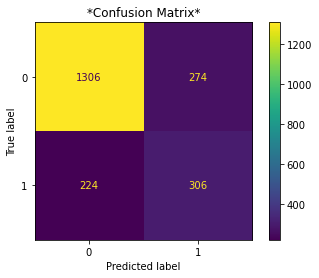

***************Classification report*************
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1580
           1       0.53      0.58      0.55       530

    accuracy                           0.76      2110
   macro avg       0.69      0.70      0.70      2110
weighted avg       0.77      0.76      0.77      2110

                                 features  Importance_score
0                                  tenure          0.189502
1                          MonthlyCharges          0.181810
2                       Contract_Two year          0.069624
3                      OnlineSecurity_Yes          0.052978
4                         TechSupport_Yes          0.048583
5                       Contract_One year          0.048220
6             InternetService_Fiber optic          0.037052
7                          Dependents_Yes          0.031637
8                             Partner_Yes          0.029654
9                      

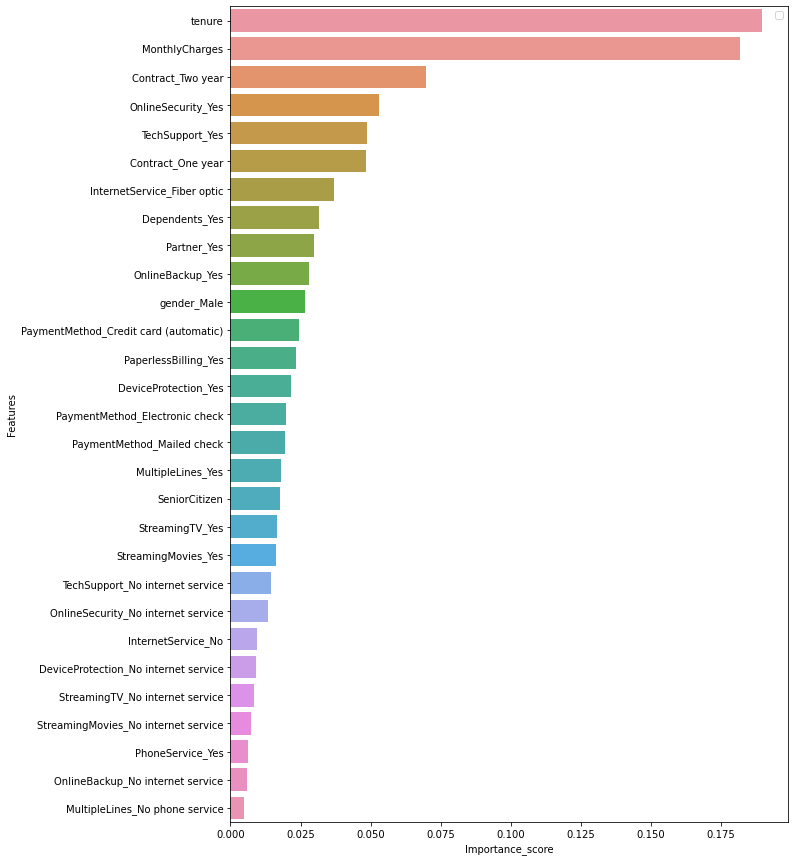

In [16]:




print("Accuracy:******************",metrics.accuracy_score(y_test, y_pred))


#visualizing confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test,cmap='viridis')  # doctest: +SKIP
plt.title("*Confusion Matrix*")
plt.show()

print("***************Classification report*************")
print(classification_report(y_test, y_pred))

#sns.heatmap(classification_report(y_test, y_pred))
#plt.show()

feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
#sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
#print(feature_imp)
visual=feature_imp.reset_index()
   
   
visual.rename(columns = {'index':'features', 0:'Importance_score'}, inplace = True) 
print(visual)
fig=plt.subplots(figsize=(10,15))
sns.barplot(x = 'Importance_score', y = 'features', data = visual)
plt.xlabel('Importance_score')
plt.ylabel('Features')
#plt.title("Visualizing Important Features")

plt.legend()
plt.show()

****2.Light Gradient Boosting ****

In [17]:



from lightgbm import LGBMClassifier
model = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.7744075829383886


 **3. Gradient Boosting**

In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# define dataset

model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.1,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))




/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[12:09:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy: 0.776303317535545


# Using **Artificial neural network (ANN)** to check if there is **any improvement in accuracy**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,Flatten

model=Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.4))
model.add(Dense(64,activation='relu'))



model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=2)
results=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[early_stop])


Epoch 1/50
224/224 [==============================] - 1s 3ms/step - loss: 0.6141 - accuracy: 0.7056 - val_loss: 0.5654 - val_accuracy: 0.6820
Epoch 2/50
224/224 [==============================] - 1s 2ms/step - loss: 0.5132 - accuracy: 0.7531 - val_loss: 0.4567 - val_accuracy: 0.7782
Epoch 3/50
224/224 [==============================] - 1s 2ms/step - loss: 0.4672 - accuracy: 0.7815 - val_loss: 0.4430 - val_accuracy: 0.7858
Epoch 4/50
224/224 [==============================] - 1s 3ms/step - loss: 0.4385 - accuracy: 0.8056 - val_loss: 0.4743 - val_accuracy: 0.7602
Epoch 5/50
224/224 [==============================] - 1s 2ms/step - loss: 0.4189 - accuracy: 0.8117 - val_loss: 0.4743 - val_accuracy: 0.7611


# We can from above results that there is no significant improvement even after using ANN.